# Задачи


---

Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).


2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (5 баллов)


3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов) 


4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)


5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (10 баллов) 


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. (35 баллов)

**Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться курсом. Обосновать свой выбор ты можешь с помощью фактов сдачи экзаменов, распределения студентов и уникальный идентефикатор курса.**

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

---


# Описание файлов


- <font color='red'>assessments.csv</font> — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

**code_module** — идентификационный код предмета.

**code_presentation** — семестр (Идентификационный код).

**id_assessment** — тест (Идентификационный номер ассессмента).

**assessment_type** — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

**date** — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

**weight** — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

---

 - <font color='red'>courses.csv</font> — файл содержит список предметов по семестрам.
 
**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код).

**module_presentation_length** — продолжительность семестра в днях.

---

 - <font color='red'>studentAssessment.csv</font> — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

**id_assessment** — тест (идентификационный номер).

**id_student** — идентификационный номер студента.

**date_submitted** — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

**is_banked** — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

**score** — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

---

 - <font color='red'>studentRegistration.csv</font> — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код)

**id_student** — идентификационный номер студента.

**date_registration** — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

**date_unregistration** — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

---

# Прочитаем файлы с данными и ознакомимся с общей информацией

---

In [72]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Считываем файлы

url1 = 'https://disk.yandex.ru/d/PBW7aUHGuodFDA'
url2 = 'https://disk.yandex.ru/d/m0Z6QYNT46f9tQ'
url3 = 'https://disk.yandex.ru/d/lsmdbYB0iM7p3w'
url4 = 'https://disk.yandex.ru/d/Yse4Y6RJqg_WaA'
root = 'https://getfile.dokpub.com/yandex/get/'

assessments = pd.read_csv(root+url1)
courses = pd.read_csv(root+url2)
studentAssessment = pd.read_csv(root+url3)
studentRegistration = pd.read_csv(root+url4)

---

In [74]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [75]:
assessments.shape

(206, 6)

In [76]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [77]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [78]:
assessments.duplicated().sum()

0

---

In [79]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [80]:
courses.shape

(22, 3)

In [81]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [82]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [83]:
courses.duplicated().sum()

0

---

In [84]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [85]:
studentAssessment.shape

(173912, 5)

In [86]:
studentAssessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [87]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Есть пропущенные значения в поле с баллами. Заменим их на ноль. Средним заменять не стоит, ибо у нас нет на это оснований и можно ухудшить качество данных.

In [88]:
studentAssessment.duplicated().sum()

0

In [89]:
studentAssessment = studentAssessment.fillna(0)

---

In [90]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [91]:
studentRegistration.shape

(32593, 5)

In [92]:
studentRegistration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [93]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [94]:
studentRegistration.duplicated().sum()

0

### На что обратить внимание.

Запишу здесь моменты, которые могут быть причинами проблем при дальшейнем анализе, а могут и не быть. Поэтому сразу решать их не будем. Просто подметим.

- assessments: есть пропущенные значения в поле date.
- studentAssessment: есть пропущенные значения в поле score.
- studentRegistration: есть пропущенные значения в поле date_registration.

---

## 1. Сколько студентов успешно сдали только один курс? 

Пусть один курс - это уникальная комбинация предмета (code_module) и семестра (code_presentation)

Так как в задании написано, что успешная сдача — это зачёт по курсу на экзамене, мы не будем учитывать неэкзаменационные тесты и то, уложился ли срок сдачи экзамена в срок окончательной сдачи (assessments['date']). Будем учитывать только баллы за экзаменационный тест. Если >= 40, то сдал, иначе - не сдал.

Объединим таблицы assesments и studentAssessments по полю id_assesments

In [95]:
merge1 = assessments.merge(studentAssessment, how='left', on='id_assessment')
merge1

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391.0,18.0,0.0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400.0,22.0,0.0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604.0,17.0,0.0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885.0,26.0,0.0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053.0,19.0,0.0,79.0
...,...,...,...,...,...,...,...,...,...,...
173925,GGG,2014J,37437,TMA,173.0,0.0,652539.0,176.0,0.0,75.0
173926,GGG,2014J,37437,TMA,173.0,0.0,653157.0,187.0,0.0,70.0
173927,GGG,2014J,37437,TMA,173.0,0.0,653252.0,171.0,0.0,70.0
173928,GGG,2014J,37437,TMA,173.0,0.0,653374.0,172.0,0.0,50.0


Каждая строчка в получившейся таблице это результат одного студента по одному из тестов.

Посмотрим на пропущенные значения.

In [96]:
merge1.isna().sum()

code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2873
weight                  0
id_student             18
date_submitted         18
is_banked              18
score                  18
dtype: int64

По некоторым экзаменам нет результатов ни у одного студента. Удалим их и отфильтруем результаты только по экзаменам.

In [97]:
merge1_exams = merge1.dropna(subset=['id_student', 'score']) \
    .query('assessment_type == "Exam"') \
    .reset_index()

merge1_exams

,index,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,52929,CCC,2014B,24290,Exam,NaN,100.0,558914.0,230.0,0.0,32.0
1,52930,CCC,2014B,24290,Exam,NaN,100.0,559706.0,234.0,0.0,78.0
2,52931,CCC,2014B,24290,Exam,NaN,100.0,559770.0,230.0,0.0,54.0
3,52932,CCC,2014B,24290,Exam,NaN,100.0,560114.0,230.0,0.0,64.0
4,52933,CCC,2014B,24290,Exam,NaN,100.0,560311.0,234.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
4954,95988,DDD,2014J,25368,Exam,NaN,100.0,652680.0,243.0,0.0,91.0
4955,95989,DDD,2014J,25368,Exam,NaN,100.0,652732.0,249.0,0.0,47.0
4956,95990,DDD,2014J,25368,Exam,NaN,100.0,652965.0,242.0,0.0,87.0
4957,95991,DDD,2014J,25368,Exam,NaN,100.0,653051.0,242.0,0.0,27.0


Теперь создадим новый столбец result, где запишем бинарный результат: True - сдал, False - не сдал.

In [98]:
merge1_exams['result'] = merge1_exams['score'] >= 40
merge1_exams

,index,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,result
0,52929,CCC,2014B,24290,Exam,NaN,100.0,558914.0,230.0,0.0,32.0,False
1,52930,CCC,2014B,24290,Exam,NaN,100.0,559706.0,234.0,0.0,78.0,True
2,52931,CCC,2014B,24290,Exam,NaN,100.0,559770.0,230.0,0.0,54.0,True
3,52932,CCC,2014B,24290,Exam,NaN,100.0,560114.0,230.0,0.0,64.0,True
4,52933,CCC,2014B,24290,Exam,NaN,100.0,560311.0,234.0,0.0,100.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4954,95988,DDD,2014J,25368,Exam,NaN,100.0,652680.0,243.0,0.0,91.0,True
4955,95989,DDD,2014J,25368,Exam,NaN,100.0,652732.0,249.0,0.0,47.0,True
4956,95990,DDD,2014J,25368,Exam,NaN,100.0,652965.0,242.0,0.0,87.0,True
4957,95991,DDD,2014J,25368,Exam,NaN,100.0,653051.0,242.0,0.0,27.0,False


Сгруппируем данные по студентам и посчитаем кол-во сданных экзаменов.

In [99]:
merge1_exams.groupby('id_student') \
    .agg({'result' : 'sum'}) \
    .value_counts()

result
1         3802
0          536
2          295
dtype: int64

## Вывод

Только один курс сдали 3082 студента.

---

## 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Воспользуемся объединённой таблицей merge1, которую сформировали на предыдущем этапе. Сгруппируем по предмету и посмотрим на распределение кол-ва студентов с разбивкой по типу теста.

In [100]:
merge1.groupby(['code_module', 'assessment_type']).agg({'id_student' : 'count'})

id_student
code_module assessment_type            
AAA         Exam                      0
            TMA                    3149
BBB         CMA                   15958
            Exam                      0
            TMA                   27074
CCC         CMA                    9766
            Exam                   1915
            TMA                    7259
DDD         CMA                    5252
            Exam                   3044
            TMA                   22568
EEE         Exam                      0
            TMA                    7893
FFF         CMA                   29992
            Exam                      0
            TMA                   24823
GGG         CMA                    9559
            Exam                      0
            TMA                    5660

Как видно, студенты сдают экзамены только по 2-м предметам. При этом, судя по таблице assessments, экзамены по другим предметам существуют и с неэкзаменационными тестами у них всё в порядке. Сложно сказать, почему мы видим такую картину. Я бы уточнил у Василия, что это за экзамены такие, которые никто не сдаёт.

Возможно, стоило по-другому определить курс и его успешную сдачу. А именно у предметов, экзамены которых никто не сдаёт, посчитать сумму весов сданных тестов. Если сумма будет равна 100, то курс успешно сдан. Но в первом вопросе есть уточнение: "Успешная сдача — это зачёт по курсу на экзамене". Стало быть, следует использовать только экзамены. Поэтому я так и сделал.

Чтобы посчитать завершаемость курсов, воспользуемся ранне сформированной табличкой merge1_exams.

In [101]:
#Группируем и агрегируем результаты

finalizability = merge1_exams.pivot_table(index=['code_module', 'code_presentation'],
                                          columns='result',
                                          values='id_student',
                                          aggfunc='count')

finalizability

result                         False  True 
code_module code_presentation              
CCC         2014B                 83    664
            2014J                149   1019
DDD         2013B                 98    504
            2013J                 90    878
            2014B                 39    485
            2014J                108    842

In [102]:
#Добавляем поле с завершаемостью

finalizability['frequency'] = finalizability[1] / (finalizability[1] + finalizability[0])

In [103]:
finalizability

result                         False  True  frequency
code_module code_presentation                        
CCC         2014B                 83   664   0.888889
            2014J                149  1019   0.872432
DDD         2013B                 98   504   0.837209
            2013J                 90   878   0.907025
            2014B                 39   485   0.925573
            2014J                108   842   0.886316

In [104]:
# Самый сложный курс

finalizability[finalizability['frequency'] == finalizability['frequency'].min()]

,result,False,True,frequency
code_module,code_presentation,,,
DDD,2013B,98,504,0.837209


In [105]:
# Самый легкий курс

finalizability[finalizability['frequency'] == finalizability['frequency'].max()]

,result,False,True,frequency
code_module,code_presentation,,,
DDD,2014B,39,485,0.925573


## Вывод

Курс по предмету DDD семестра 2013B - самый сложный  
Курс по предмету DDD семестра 2014B - самый легкий

---

## 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

Воспользуемся всё той же таблицей merge1_exams

In [106]:
merge1_exams

,index,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,result
0,52929,CCC,2014B,24290,Exam,NaN,100.0,558914.0,230.0,0.0,32.0,False
1,52930,CCC,2014B,24290,Exam,NaN,100.0,559706.0,234.0,0.0,78.0,True
2,52931,CCC,2014B,24290,Exam,NaN,100.0,559770.0,230.0,0.0,54.0,True
3,52932,CCC,2014B,24290,Exam,NaN,100.0,560114.0,230.0,0.0,64.0,True
4,52933,CCC,2014B,24290,Exam,NaN,100.0,560311.0,234.0,0.0,100.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4954,95988,DDD,2014J,25368,Exam,NaN,100.0,652680.0,243.0,0.0,91.0,True
4955,95989,DDD,2014J,25368,Exam,NaN,100.0,652732.0,249.0,0.0,47.0,True
4956,95990,DDD,2014J,25368,Exam,NaN,100.0,652965.0,242.0,0.0,87.0,True
4957,95991,DDD,2014J,25368,Exam,NaN,100.0,653051.0,242.0,0.0,27.0,False


Оставим только успешные сдачи. Отсортируем по убыванию даты сдачи внутри каждого студента. Сгруппируем по предмету, студенту и возьмём верхнюю строчку. Дальше ещё раз сгруппируем по предмету и посчитаем средний срок сдачи экзамена.

In [107]:
merge1_exams.query('result == 1') \
    .sort_values(['id_student', 'date_submitted'], ascending=False) \
    .groupby(['code_module' ,'id_student']) \
    .head(1) \
    .groupby('code_module') \
    .agg({'date_submitted' : 'mean'}) \
    .reset_index() \
    .rename(columns={'date_submitted' : 'mean_date_submitted'})

,code_module,mean_date_submitted
0,CCC,239.345217
1,DDD,237.978566


По остальным предметам экзамены никто не сдавал.

---

## 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

Возьмём таблицу с регистрациями. Посмотрим на пропущенные значения в поле date_registration.

In [108]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [109]:
studentRegistration[studentRegistration['date_registration'].isna() == True].head(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0
5573,BBB,2014B,614270,NaN,-142.0
6295,BBB,2014B,2409808,NaN,-109.0
6305,BBB,2014B,2439442,NaN,-149.0
8307,BBB,2014J,694001,NaN,-36.0
8975,CCC,2014B,394791,NaN,-61.0


Не будем ничего выдумывать с заменами пропусков, так как таких строчек всего 45. Просто удалим их.

In [110]:
reg = studentRegistration.dropna(subset=['date_registration'])

Посчитаем Топ-3 предметов по кол-ву регистрации на них.

In [111]:
reg.groupby('code_module') \
    .agg({'date_registration' : 'count'}) \
    .rename(columns={'date_registration' : 'count_date_registration'}) \
    .sort_values('count_date_registration', ascending=False) \
    .reset_index() \
    .head(3)

,code_module,count_date_registration
0,BBB,7900
1,FFF,7751
2,DDD,6257


Посчитаем Топ-3 предметов с самым большим оттоком.

In [112]:
reg.groupby('code_module') \
    .agg({'date_unregistration' : 'count'}) \
    .rename(columns={'date_unregistration' : 'count_date_unregistration'}) \
    .sort_values('count_date_unregistration', ascending=False) \
    .reset_index() \
    .head(3)

,code_module,count_date_unregistration
0,FFF,2370
1,BBB,2369
2,DDD,2223


---

## 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Воспользуемся таблицами, которые мы сформировали в 2 и 3 шагах. Немного поменяем группировку и получится как раз то, что нам нужно.

Изначально у меня была идея взять уже посчитанные в таблице finalizability завершаемости курсов и посчитать среднюю завершаемость между предметами внутри семестров, но вскоре я понял, что тут мы натыкаемся на тот самый парадокс Симпсона и теорию о средневзвешенном. Поэтому будем сразу группировать по семестрам без разбивки по предметам.

In [113]:
merge1_exams.head()

,index,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,result
0,52929,CCC,2014B,24290,Exam,NaN,100.0,558914.0,230.0,0.0,32.0,False
1,52930,CCC,2014B,24290,Exam,NaN,100.0,559706.0,234.0,0.0,78.0,True
2,52931,CCC,2014B,24290,Exam,NaN,100.0,559770.0,230.0,0.0,54.0,True
3,52932,CCC,2014B,24290,Exam,NaN,100.0,560114.0,230.0,0.0,64.0,True
4,52933,CCC,2014B,24290,Exam,NaN,100.0,560311.0,234.0,0.0,100.0,True


In [114]:
# Считаем средний срок сдачи курса в каждом семестре.

meanDateSubmittedForSem = merge1_exams.query('result == 1') \
    .groupby(['code_presentation','id_student']) \
    .agg({'date_submitted' : 'max'}) \
    .groupby(['code_presentation']) \
    .agg({'date_submitted' : 'mean'}) \
    .reset_index() \
    .rename(columns={'date_submitted' : 'mean_date_submitted'})

meanDateSubmittedForSem

,code_presentation,mean_date_submitted
0,2013B,230.164683
1,2013J,239.509112
2,2014B,233.007018
3,2014J,243.707277


In [115]:
# Считаем кол-во успешных и неуспешных сдач в каждом семестре.

finalizability_2 = merge1_exams.pivot_table(index=['code_presentation'],
                                          columns='result',
                                          values='id_student',
                                          aggfunc='count').reset_index()

finalizability_2

result,code_presentation,False,True
0,2013B,98,504
1,2013J,90,878
2,2014B,122,1149
3,2014J,257,1861


In [116]:
# Добавляем поле с завершаемостью.

finalizability_2['frequency'] = finalizability_2[1] / (finalizability_2[1] + finalizability_2[0])
finalizability_2

result,code_presentation,False,True,frequency
0,2013B,98,504,0.837209
1,2013J,90,878,0.907025
2,2014B,122,1149,0.904013
3,2014J,257,1861,0.878659


In [117]:
meanDateSubmittedForSem[meanDateSubmittedForSem['mean_date_submitted'] == meanDateSubmittedForSem['mean_date_submitted'].max()]

,code_presentation,mean_date_submitted
3,2014J,243.707277


In [118]:
finalizability_2[finalizability_2['frequency'] == finalizability_2['frequency'].min()]

result,code_presentation,False,True,frequency
0,2013B,98,504,0.837209


## Вывод

Семестр с самой низкой завершаемостью - 2013B.  
Семестр с самым высоким средним сроком сдачи курса - 2014J.

---

### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [119]:
# Возьмём всё ту же таблицу merge1_exams

merge1_exams.head()

,index,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,result
0,52929,CCC,2014B,24290,Exam,NaN,100.0,558914.0,230.0,0.0,32.0,False
1,52930,CCC,2014B,24290,Exam,NaN,100.0,559706.0,234.0,0.0,78.0,True
2,52931,CCC,2014B,24290,Exam,NaN,100.0,559770.0,230.0,0.0,54.0,True
3,52932,CCC,2014B,24290,Exam,NaN,100.0,560114.0,230.0,0.0,64.0,True
4,52933,CCC,2014B,24290,Exam,NaN,100.0,560311.0,234.0,0.0,100.0,True


Посмотрим, как распределена завершаемость курсов по каждому студенту

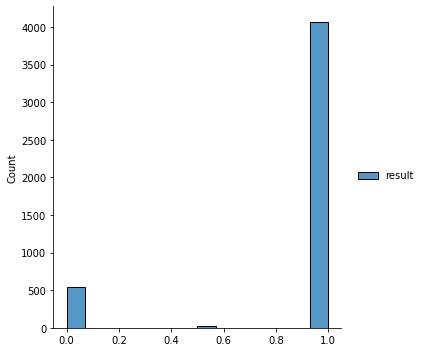

In [120]:
ax = sns.displot(merge1_exams.groupby('id_student').agg({'result' : 'mean'}))

In [121]:
# Посмотрим, какие уникальны значения есть

merge1_exams.groupby('id_student').agg({'result' : 'mean'}).result.unique()

array([1. , 0. , 0.5])

In [122]:
# Посмотрим, по сколько экзаменов сдавали студенты

merge1_exams.groupby('id_student').agg({'result' : 'count'}).result.unique()

array([1, 2])

Видим, что студенты сдавали только по 1-2 экзамена. Поэтому не удивительно, что завершаемость принимает только 3 значения.  
Разделять студентов по сегментам завершаемости (F) не стоит, так как студентов с завершаемостью 0.5 очень мало, а у студентов с завершаемость 0, соответственно, и средний срок сдачи экзамена (R) будет 0. Поэтому будем делать RM анализ.

In [123]:
# Возьмём только нужные нам поля

exams_for_rfm = merge1_exams[['id_student', 'date_submitted', 'score', 'result']]

Так как средний срок сдачи экзамена нужно считать только по успешным сдачам, а средний балл за экзамен - по всем, пришлось посчитать эти показатели в отдельных таблицах и после объединить.

In [124]:
l = exams_for_rfm.groupby('id_student').agg({'score' : 'mean', 'result' : 'mean'}).reset_index()
r = exams_for_rfm[exams_for_rfm['result'] == 1].groupby('id_student').agg({'date_submitted' : 'mean'}).reset_index()
rfm = l.merge(r, how='left', on='id_student')
rfm.head()

,id_student,score,result,date_submitted
0,23698.0,80.0,1.0,243.0
1,24213.0,58.0,1.0,236.0
2,27116.0,96.0,1.0,243.0
3,28046.0,40.0,1.0,237.0
4,28787.0,44.0,1.0,243.0


In [125]:
rfm.isna().sum()

id_student          0
score               0
result              0
date_submitted    536
dtype: int64

После объединения образовались пустые значения в дате сдачи. Это те студенты, у которых завершаемость равна 0. Они нам не нужны, поэтому удалим их. И за одно переименнуем заголовки столбцов.

In [126]:
rfm = rfm.dropna().rename(columns=({'score' : 'mean_score',
                                    'result' : 'frequency',
                                    'date_submitted' : 'mean_date_submitted'}))
rfm.head()

,id_student,mean_score,frequency,mean_date_submitted
0,23698.0,80.0,1.0,243.0
1,24213.0,58.0,1.0,236.0
2,27116.0,96.0,1.0,243.0
3,28046.0,40.0,1.0,237.0
4,28787.0,44.0,1.0,243.0


Делить будем по равным квантилям на 4 части.

In [127]:
quantiles = rfm[['mean_date_submitted', 'mean_score']].quantile([0.25, 0.5, 0.75]).to_dict()
quantiles

{'mean_date_submitted': {0.25: 234.0, 0.5: 241.0, 0.75: 243.0},
 'mean_score': {0.25: 56.0, 0.5: 69.0, 0.75: 84.0}}

Напишем функцию, которая в новом поле будет присваивать студенту номер его сегмента.

In [128]:
def rm_score(x, name):
    if x <= quantiles[name][0.25]:
        return 1
    elif x <= quantiles[name][0.5]:
        return 2
    elif x <= quantiles[name][0.75]:
        return 3
    else:
        return 4

Создаём новые поля с сегментами.

In [129]:
rfm['R'] = rfm['mean_date_submitted'].apply(lambda x: rm_score(x, 'mean_date_submitted'))
rfm['M'] = rfm['mean_score'].apply(lambda x: rm_score(x, 'mean_score'))
rfm['RM_score'] = rfm['R'].map(str) + rfm['M'].map(str)
rfm.head()

,id_student,mean_score,frequency,mean_date_submitted,R,M,RM_score
0,23698.0,80.0,1.0,243.0,3,3,33
1,24213.0,58.0,1.0,236.0,2,2,22
2,27116.0,96.0,1.0,243.0,3,4,34
3,28046.0,40.0,1.0,237.0,2,1,21
4,28787.0,44.0,1.0,243.0,3,1,31


Построим барплоты для распределения времени сдачи экзамена и барплоты для распределения сегментов кол-ва баллов по сегментам времени сдачи экзамена.

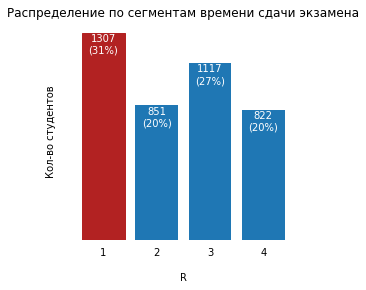

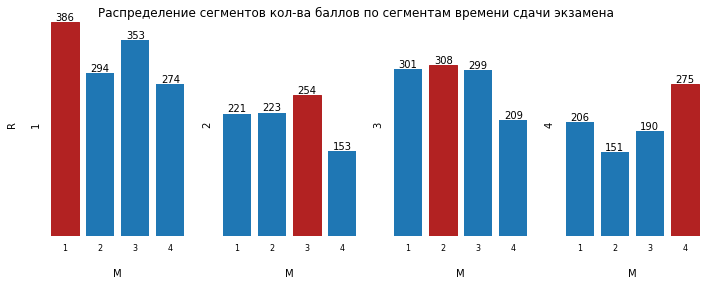

In [130]:
# Распределение по сегментам времени сдачи экзамена

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

y = rfm['R'].value_counts().sort_index()
x = y.index
bars = ax.bar(x, y)
ax.set_frame_on(False)
ax.tick_params(left=False, labelleft=False, bottom=False)
ax.set_xlabel('\nR')
ax.set_ylabel('Кол-во студентов\n')
ax.set_title('Распределение по сегментам времени сдачи экзамена',
            fontsize=12)
for bar in bars:
    value = bar.get_height()
    if value == y.max():
        bar.set_color('firebrick')
    ax.text(bar.get_x() + bar.get_width() / 2,
            value - 5,
            '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
           ha='center',
           va='top',
           color='w')

plt.show()

# Распределение сегментов кол-ва баллов по сегментам времени сдачи экзамена

fig, axes = plt.subplots(nrows=1, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 4))

r_range = range(1, 5)
for r in r_range:
    y = rfm[rfm['R'] == r]['M'].value_counts().sort_index()
    x = y.index
    ax = axes[r - 1]
    bars = ax.bar(x, y)
    ax.set_xlabel('\nM')
    if r == 1:
        ax.set_ylabel('R\n\n{}'.format(r))
    else:
        ax.set_ylabel(r)
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=8)

    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value,
                int(value),
                ha='center',
                va='bottom',
                color='k')
fig.suptitle('Распределение сегментов кол-ва баллов по сегментам времени сдачи экзамена',
             fontsize=12)
plt.tight_layout()
plt.show()